In [167]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [168]:

df = df[["survived", "pclass", "sex", "age", "fare", "who", "adult_male", "alone"]]

df_sex = df['sex'].copy()

for i, value in enumerate(df_sex):
    if value == 'male':
        df_sex.loc[i] = 0
    elif value == 'female':
        df_sex.loc[i] = 1
    
df.sex = df_sex

df_who = df['who'].copy()

for i, value in enumerate(df_who):
    if value == 'man':
        df_who.loc[i] = 0
    elif value == 'woman':
        df_who.loc[i] = 1
    elif value == 'child':
        df_who.loc[i] = 2
    
df.who = df_who

df_adult_male = df['adult_male'].copy()

for i, value in enumerate(df_adult_male):
    if value == True:
        df_adult_male.loc[i] = 0
    elif value == False:
        df_adult_male.loc[i] = 1
        
df['adult_male'] = df_adult_male

df.who = df_who

df_alone = df['alone'].copy()

for i, value in enumerate(df_alone):
    if value == True:
        df_alone.loc[i] = 0
    elif value == False:
        df_alone.loc[i] = 1
        
df.alone = df_alone

df_age = df.age.copy()

pd.isna(df_age.values)
df_age_boolean = pd.isna(df_age.values).copy()
for i, value in enumerate(df_age_boolean):
    if value == True:
        df_age_boolean[i] = False
    elif value == False:
        df_age_boolean[i] = True
        
df = df[df_age_boolean]

C:\Users\rhwkw\AppData\Local\Temp\ipykernel_13572\3039746406.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex = df_sex
C:\Users\rhwkw\AppData\Local\Temp\ipykernel_13572\3039746406.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.who = df_who
C:\Users\rhwkw\AppData\Local\Temp\ipykernel_13572\3039746406.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a c

In [169]:
df['sex'] = df['sex'].astype('int64')
df['who'] = df['who'].astype('int64')
df['adult_male'] = df['adult_male'].astype('int64')
df['alone'] = df['alone'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    714 non-null    int64  
 1   pclass      714 non-null    int64  
 2   sex         714 non-null    int64  
 3   age         714 non-null    float64
 4   fare        714 non-null    float64
 5   who         714 non-null    int64  
 6   adult_male  714 non-null    int64  
 7   alone       714 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.2 KB


In [170]:
y_classes = df.survived
x_data = df[['pclass', 'sex', 'age', 'fare', 'who', 'adult_male', 'alone']]

x_data

,pclass,sex,age,fare,who,adult_male,alone
0,3,0,22.0,7.2500,0,0,1
1,1,1,38.0,71.2833,1,1,1
2,3,1,26.0,7.9250,1,1,0
3,1,1,35.0,53.1000,1,1,1
4,3,0,35.0,8.0500,0,0,0
...,...,...,...,...,...,...,...
885,3,1,39.0,29.1250,1,1,1
886,2,0,27.0,13.0000,0,0,0
887,1,1,19.0,30.0000,1,1,0
889,1,0,26.0,30.0000,0,0,0


In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_classes, random_state=42)

In [172]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

X_train_normal = normalizer.fit_transform(X_train)

X_test_normal = normalizer.fit_transform(X_test)

In [173]:
from sklearn.linear_model import LogisticRegression

logisModel = LogisticRegression()

logisModel.fit(X_train_normal, y_train)


print(logisModel.score(X_train_normal, y_train))
print(logisModel.score(X_test_normal, y_test))

0.7121495327102804
0.6368715083798883


max_depth=1 0.7869158878504673
max_depth=1 0.770949720670391
[0. 0. 0. 0. 1. 0. 0.]



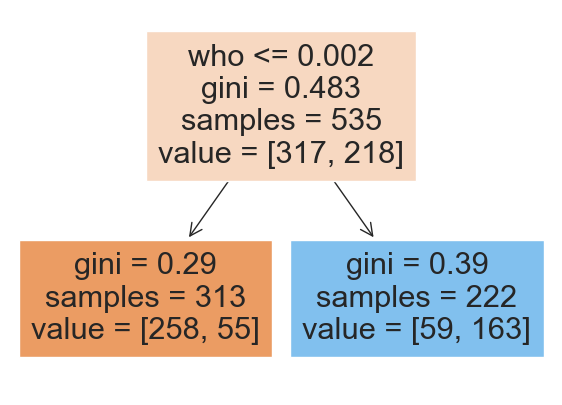


max_depth=5 0.8841121495327103
max_depth=5 0.7653631284916201
[0.22894964 0.03123838 0.02613439 0.04629096 0.00604037 0.61500817
 0.04633809]



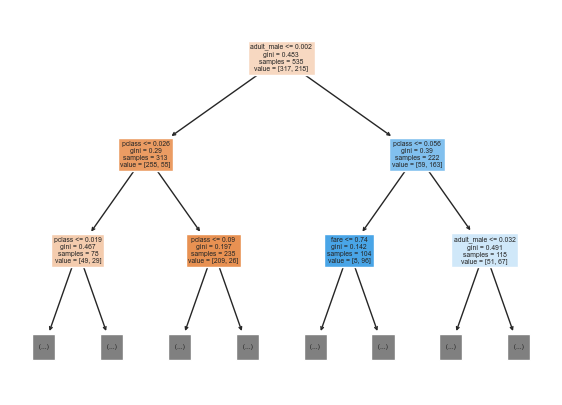


max_depth=10 0.9700934579439252
max_depth=10 0.7541899441340782
[0.23382297 0.02693691 0.09073257 0.1229109  0.38572654 0.07496534
 0.06490477]



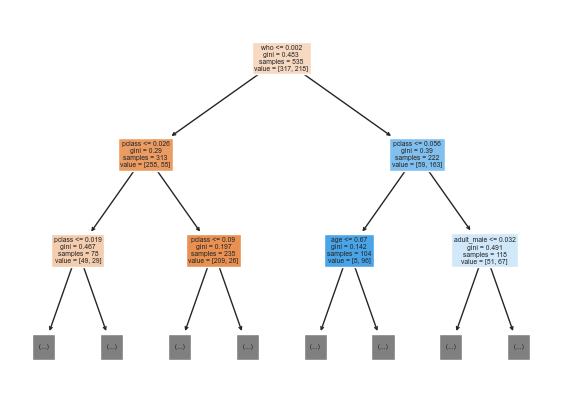


max_depth=20 0.9925233644859813
max_depth=20 0.7374301675977654
[0.25701509 0.04596288 0.076941   0.14412753 0.35316256 0.08735259
 0.03543836]



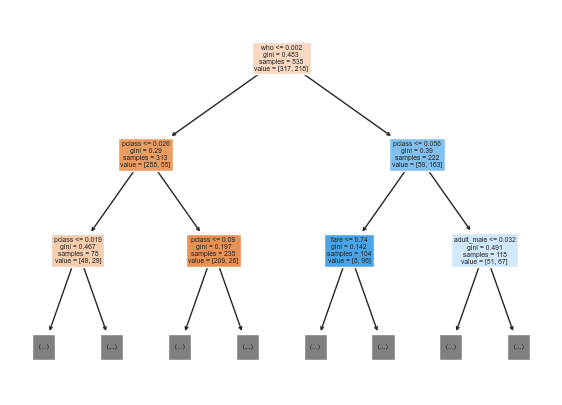


max_depth=50 0.9925233644859813
max_depth=50 0.7039106145251397
[0.26569443 0.02506532 0.09285437 0.10763001 0.35190138 0.09780943
 0.05904506]



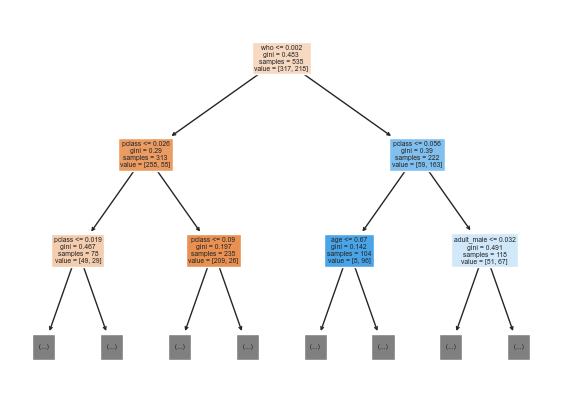


max_depth=100 0.9925233644859813
max_depth=100 0.7318435754189944
[0.24972427 0.02094094 0.1184323  0.12540643 0.04853784 0.39962206
 0.03733615]



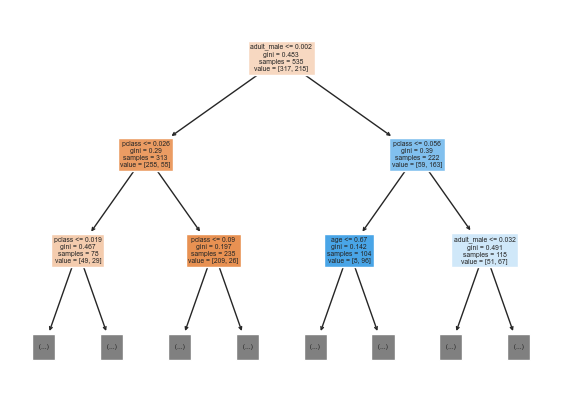

In [193]:
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
    
for i in [1, 5, 10, 20, 50, 100]:
    from sklearn.tree import plot_tree
    DTClassifiermodel = DecisionTreeClassifier(max_depth=i)
    DTClassifiermodel.fit(X_train_normal, y_train)
    
    print(f'max_depth={i}', DTClassifiermodel.score(X_train_normal, y_train))
    print(f'max_depth={i}', DTClassifiermodel.score(X_test_normal, y_test))
    print(DTClassifiermodel.feature_importances_)
    print()
    
    plt.figure(figsize=(7, 5))
    plot_tree(DTClassifiermodel, max_depth=2, filled=True, feature_names=['pclass', 'sex', 'age', 'fare', 'who', 'adult_male', 'alone'])
    plt.show()
    print()
    

In [175]:
DTClassifiermodel = DecisionTreeClassifier(max_depth=i)
DTClassifiermodel.fit(X_train_normal, y_train)


DecisionTreeClassifier(max_depth=100)

In [176]:
from sklearn.metrics import confusion_matrix

y_pred_logis = logisModel.predict(X_test_normal)

logis_metrix = confusion_matrix(y_test, y_pred_logis) 
logis_metrix

array([[85, 22],
       [43, 29]], dtype=int64)

In [177]:
print("TN, FP, FN, TP:", logis_metrix.ravel())
logis_TN, logis_FP, logis_FN, logis_TP = logis_metrix.ravel()

TN, FP, FN, TP: [85 22 43 29]


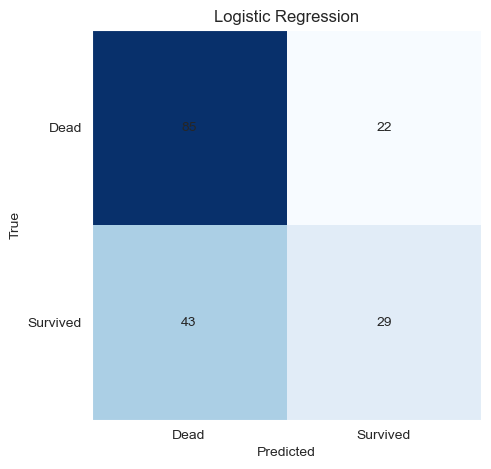

In [178]:
import matplotlib.pyplot as plt

class_labels = ['Dead', 'Survived']

fig = plt.figure()

fig.set_size_inches([5, 5])

plt.imshow(logis_metrix, interpolation='nearest') 
plt.xticks([0, 1], class_labels)
plt.yticks([0, 1], class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression')
for i in range(logis_metrix.shape[0]):
    for j in range(logis_metrix.shape[1]):
        plt.text(j, i, logis_metrix[i, j], ha='center', va='center')
plt.set_cmap('Blues')
plt.grid(False)
    
fig.tight_layout()

plt.show()

In [179]:
import matplotlib.pyplot as plt

y_pred_decision = DTClassifiermodel.predict(X_test_normal)

decision_metrix = confusion_matrix(y_test, y_pred_decision) 
decision_metrix

array([[82, 25],
       [25, 47]], dtype=int64)

In [180]:
print("TN, FP, FN, TP:", decision_metrix.ravel())
decision_TN, decision_FP, decision_FN, decision_TP = decision_metrix.ravel()

TN, FP, FN, TP: [82 25 25 47]


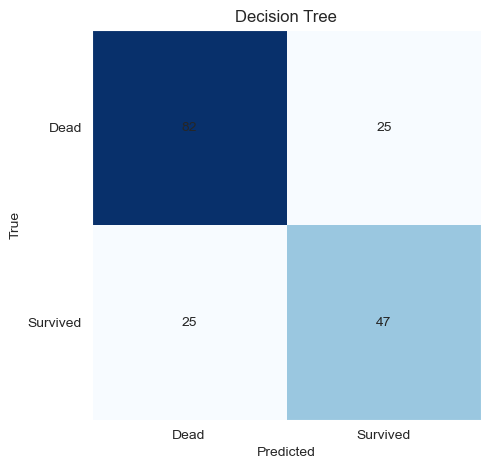

In [181]:

class_labels = ['Dead', 'Survived']

fig = plt.figure()

fig.set_size_inches([5, 5])

plt.imshow(decision_metrix, interpolation='nearest') 
plt.xticks([0, 1], class_labels)
plt.yticks([0, 1], class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree')
for i in range(decision_metrix.shape[0]):
    for j in range(decision_metrix.shape[1]):
        plt.text(j, i, decision_metrix[i, j], ha='center', va='center')
plt.set_cmap('Blues')
plt.grid(False)
    
fig.tight_layout()

plt.show()

In [182]:
# 전체 예측(양성, 음성)에서 정답을 잘 맞춘 것
logis_accuracy = (logis_TP + logis_TN) / (logis_TN + logis_FP + logis_FN + logis_TP )
decision_accuracy = (decision_TP + decision_TN) / (decision_TN + decision_FP + decision_FN + decision_TP )

print('logis_accuracy: ', logis_accuracy, '\ndecision_accuracy: ', decision_accuracy)
print()
# "양성으로 예측"한 것 중 "실제 양성"인 것
logis_precision = logis_TP/ (logis_FP + logis_TP)
decision_precision = decision_TP/ (decision_FP + decision_TP)

print('logis_precision: ', logis_precision, '\ndecision_precision: ', decision_precision)
print()

# "실제 음성"인데 "예측을 음성"이라고 한 것
logis_specificity = logis_TN / (logis_TN + logis_FP)
decision_specificity = decision_TN / (decision_TN + decision_FP)

print('logis_specificity: ', logis_specificity, '\ndecision_specificity: ', decision_specificity)
print()

# "실제 양성"인데 "예측을 양성"이라고 한 것
logis_sensitivity = logis_TP / (logis_TP + logis_FN)
decision_sensitivity = decision_TP / (decision_TP + decision_FN)

print('logis_sensitivity: ', logis_sensitivity, '\ndecision_sensitivity: ', decision_sensitivity)
print()

# "음성으로 예측"한 것들 중 "실제 음성"인 것
logis_NPV = logis_TN / (logis_TN + logis_FN)
decision_NPV = decision_TN / (decision_TN + decision_FN)

print('logis_NPV: ', logis_NPV, '\ndecision_NPV: ', decision_NPV)
print()

# "실제 양성" 중에서 "예측을 음성"으로 분류한 비율
logis_FNR = logis_FN / (logis_FN + logis_TP)
decision_FNR = decision_FN / (decision_FN + decision_TP)

print('logis_FNR: ', logis_FNR, '\ndecision_FNR: ', decision_FNR)
print()

# "실제 양성" 중에서 "예측을 양성"으로 분류한 비율
logis_TPR = logis_TP / (logis_TP + logis_FN)
decision_TPR = decision_TP / (decision_FN + decision_TP)

print('logis_TPR: ', logis_TPR, '\ndecision_TPR: ', decision_TPR)
print()


# "실제 음성" 중에서 "예측을 양성"으로 분류한 비율
logis_FPR = logis_FP / (logis_TN + logis_FP)
decision_FPR = decision_FP / (decision_TN + decision_FP)

print('logis_FPR: ', logis_FPR, '\ndecision_FPR: ', decision_FPR)
print()


logis_accuracy:  0.6368715083798883 
decision_accuracy:  0.7206703910614525

logis_precision:  0.5686274509803921 
decision_precision:  0.6527777777777778

logis_specificity:  0.794392523364486 
decision_specificity:  0.7663551401869159

logis_sensitivity:  0.4027777777777778 
decision_sensitivity:  0.6527777777777778

logis_NPV:  0.6640625 
decision_NPV:  0.7663551401869159

logis_FNR:  0.5972222222222222 
decision_FNR:  0.3472222222222222

logis_TPR:  0.4027777777777778 
decision_TPR:  0.6527777777777778

logis_FPR:  0.205607476635514 
decision_FPR:  0.2336448598130841



In [183]:
# 조화 평균(정밀도와 민감도를 이용한 점수)
logis_f1_score = 2 * ((logis_precision*logis_sensitivity) / (logis_precision+logis_sensitivity))
decision_f1_score = 2 * ((decision_precision*decision_sensitivity) / (decision_precision+decision_sensitivity))

print('logis f1-score(조화평균):', logis_f1_score)
print('decision f1-score(조화평균):', decision_f1_score)

logis f1-score(조화평균): 0.4715447154471545
decision f1-score(조화평균): 0.6527777777777778


In [184]:
from sklearn.metrics import classification_report

# 모형 성능 평가 - 평가지표 계산
logis_report = classification_report(y_test, y_pred_logis)            
print(logis_report)

decision_report = classification_report(y_test, y_pred_decision)            
print(decision_report)

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       107
           1       0.57      0.40      0.47        72

    accuracy                           0.64       179
   macro avg       0.62      0.60      0.60       179
weighted avg       0.63      0.64      0.62       179

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       107
           1       0.65      0.65      0.65        72

    accuracy                           0.72       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.72      0.72      0.72       179



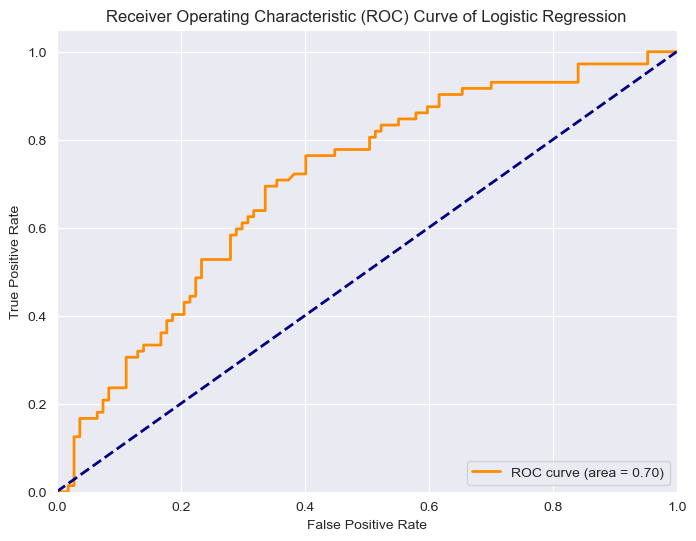

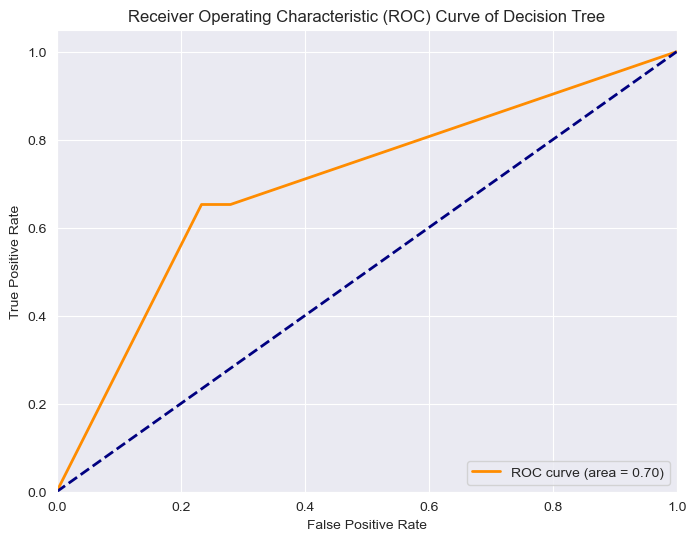

In [185]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# test data의 예측 확률을 얻음
y_prob_logis = logisModel.predict_proba(X_test_normal)[:, 1]  # 클래스 1 (생존)에 대한 예측 확률
y_prob_decision = DTClassifiermodel.predict_proba(X_test_normal)[:, 1]  # 클래스 1 (생존)에 대한 예측 확률

# ROC 커브 생성
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, y_prob_logis)
fpr_decision, tpr_decision, thresholds_decision = roc_curve(y_test, y_prob_decision)

# AUC 계산
roc_auc_logis = auc(fpr_logis, tpr_logis)
roc_auc_decision = auc(fpr_decision, tpr_decision)

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr_logis, tpr_logis, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logis)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# ROC 커브 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr_decision, tpr_decision, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_decision)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Decision Tree')
plt.legend(loc='lower right')
plt.show()